In [ ]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.0/679.0 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=bfdbd1e2339324c18fee23f1be537f559d30f3db2ca62930b4efac83e5898fff
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
     

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy import stats
from yellowbrick.cluster import KElbowVisualizer
from ydata_profiling import ProfileReport
import math

In [ ]:
# Conectar ao Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/FIA Analytics/Trabalho final/shopping_trends.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
# Informações básicas sobre os tipos de dados
print(f"Dataset shape: {df.shape}")
print("\nTipos de dados:")
print(df.dtypes)

Dataset shape: (3900, 19)

Tipos de dados:
Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object


In [ ]:
df.describe().round(2)

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.00,3900.00,3900.00,3900.00,3900.00
mean,1950.50,44.07,59.76,3.75,25.35
std,1125.98,15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,1950.50,44.00,60.00,3.70,25.00
75%,2925.25,57.00,81.00,4.40,38.00
max,3900.00,70.00,100.00,5.00,50.00


In [ ]:
profile = ProfileReport(df, title="Consumer info")
profile

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Identificação das features categoricas
categorical_features = [
    'Gender',
    'Category',
    'Location',
    'Season',
    'Subscription Status',
    'Shipping Type',
    'Discount Applied',
    'Promo Code Used',
    'Payment Method',
    'Frequency of Purchases'
]

In [ ]:
# Identificação das features numericas
numerical_features = [
    'Age',
    'Purchase Amount (USD)',
    'Review Rating',
    'Previous Purchases'
]

In [ ]:
# Especificação da coluna Customer ID
customer_id_col = 'Customer ID'

In [ ]:
# Verificação dos recursos numéricos/categóricos identificados realmente existem no DataFrame
actual_numerical_features_eda = [col for col in numerical_features if col in df.columns]
actual_categorical_features_eda = [col for col in categorical_features if col in df.columns]

In [ ]:
#Resposta explicativa quantitativa vs. resposta qualitativa
# Crie uma função para boxplots
def boxplot_by_category(df, num_var, cat_var, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    sns.boxplot(x=cat_var, y=num_var, data=df)
    plt.title(f'{num_var} by {cat_var}')
    plt.xticks(rotation=45)
    plt.tight_layout()

# estatísticas descritivas por grupo
    stats_by_group = df.groupby(cat_var)[num_var].agg(['mean', 'median', 'std', 'min', 'max'])
    print(f"Statistics of {num_var} by {cat_var}:")
    print(stats_by_group.round(2))

    return stats_by_group

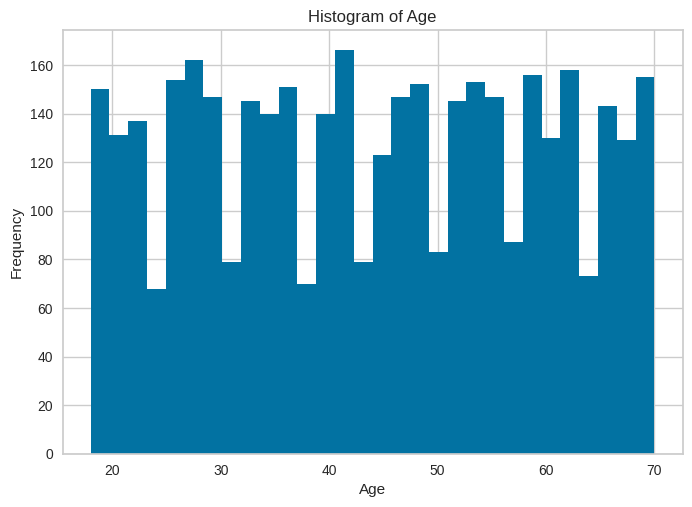

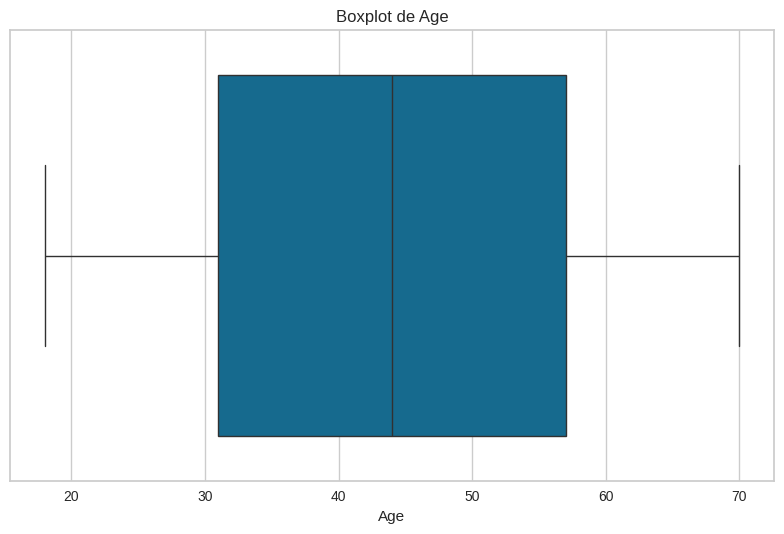

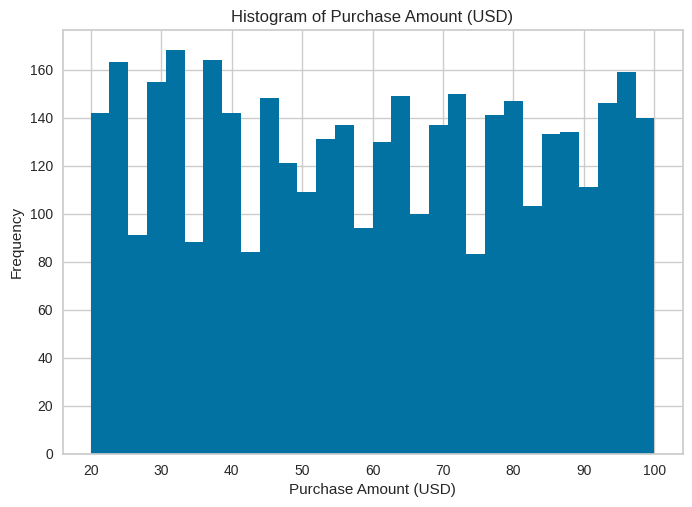

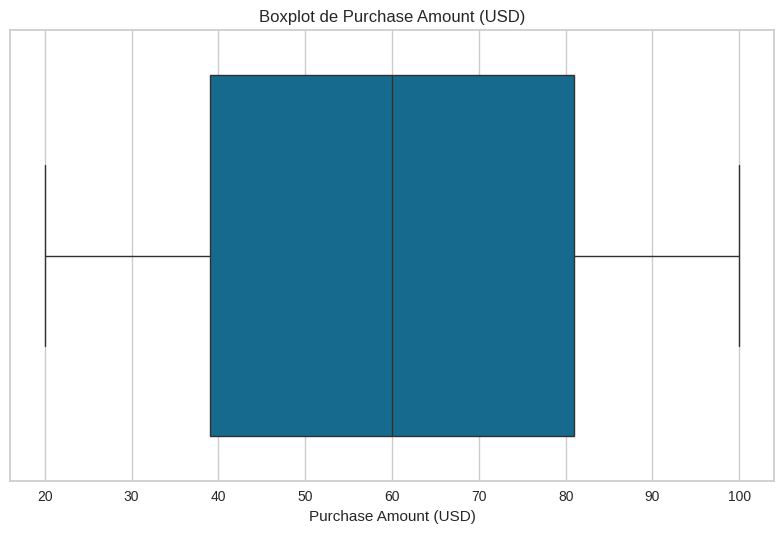

In [ ]:
# Histograms & boxplots
for col in ["Age", "Purchase Amount (USD)"]:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col); plt.ylabel("Frequency"); plt.show()

    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
    plt.show()

Statistics of Purchase Amount (USD) by Category:
              mean  median    std  min  max
Category                                   
Accessories  59.84    60.0  23.30   20  100
Clothing     60.03    60.0  23.79   20  100
Footwear     60.26    60.0  23.64   20  100
Outerwear    57.17    54.5  24.59   20  100


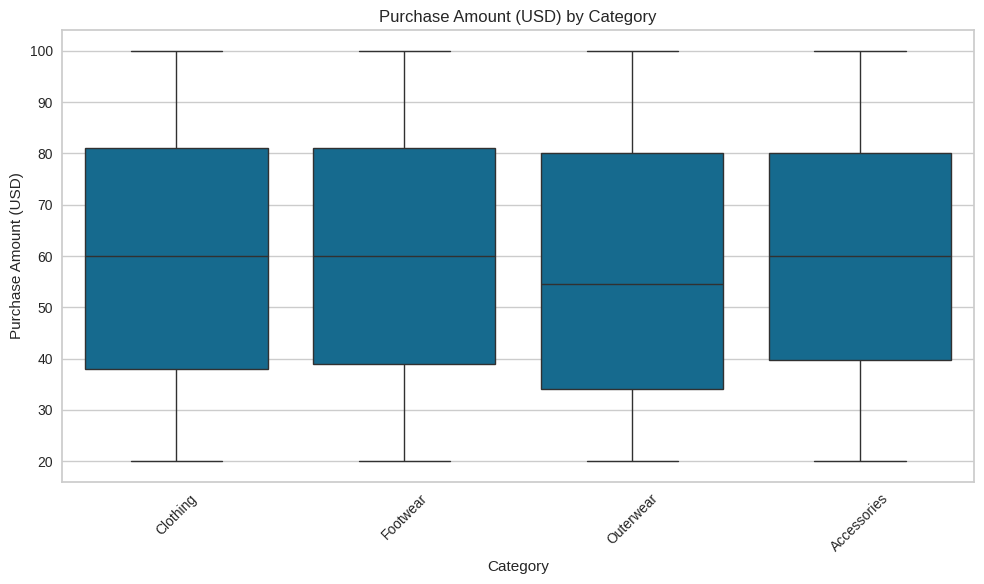

In [ ]:
# valor de compra por categoria
purchase_by_category = boxplot_by_category(df, 'Purchase Amount (USD)', 'Category')

/tmp/ipython-input-1466726164.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=order, palette='viridis') # Use y=col para barras horizontais se houver muitas categorias
/tmp/ipython-input-1466726164.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=order, palette='viridis') # Use y=col para barras horizontais se houver muitas categorias
/tmp/ipython-input-1466726164.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=order, palette='viridis') # Use y=col para bar

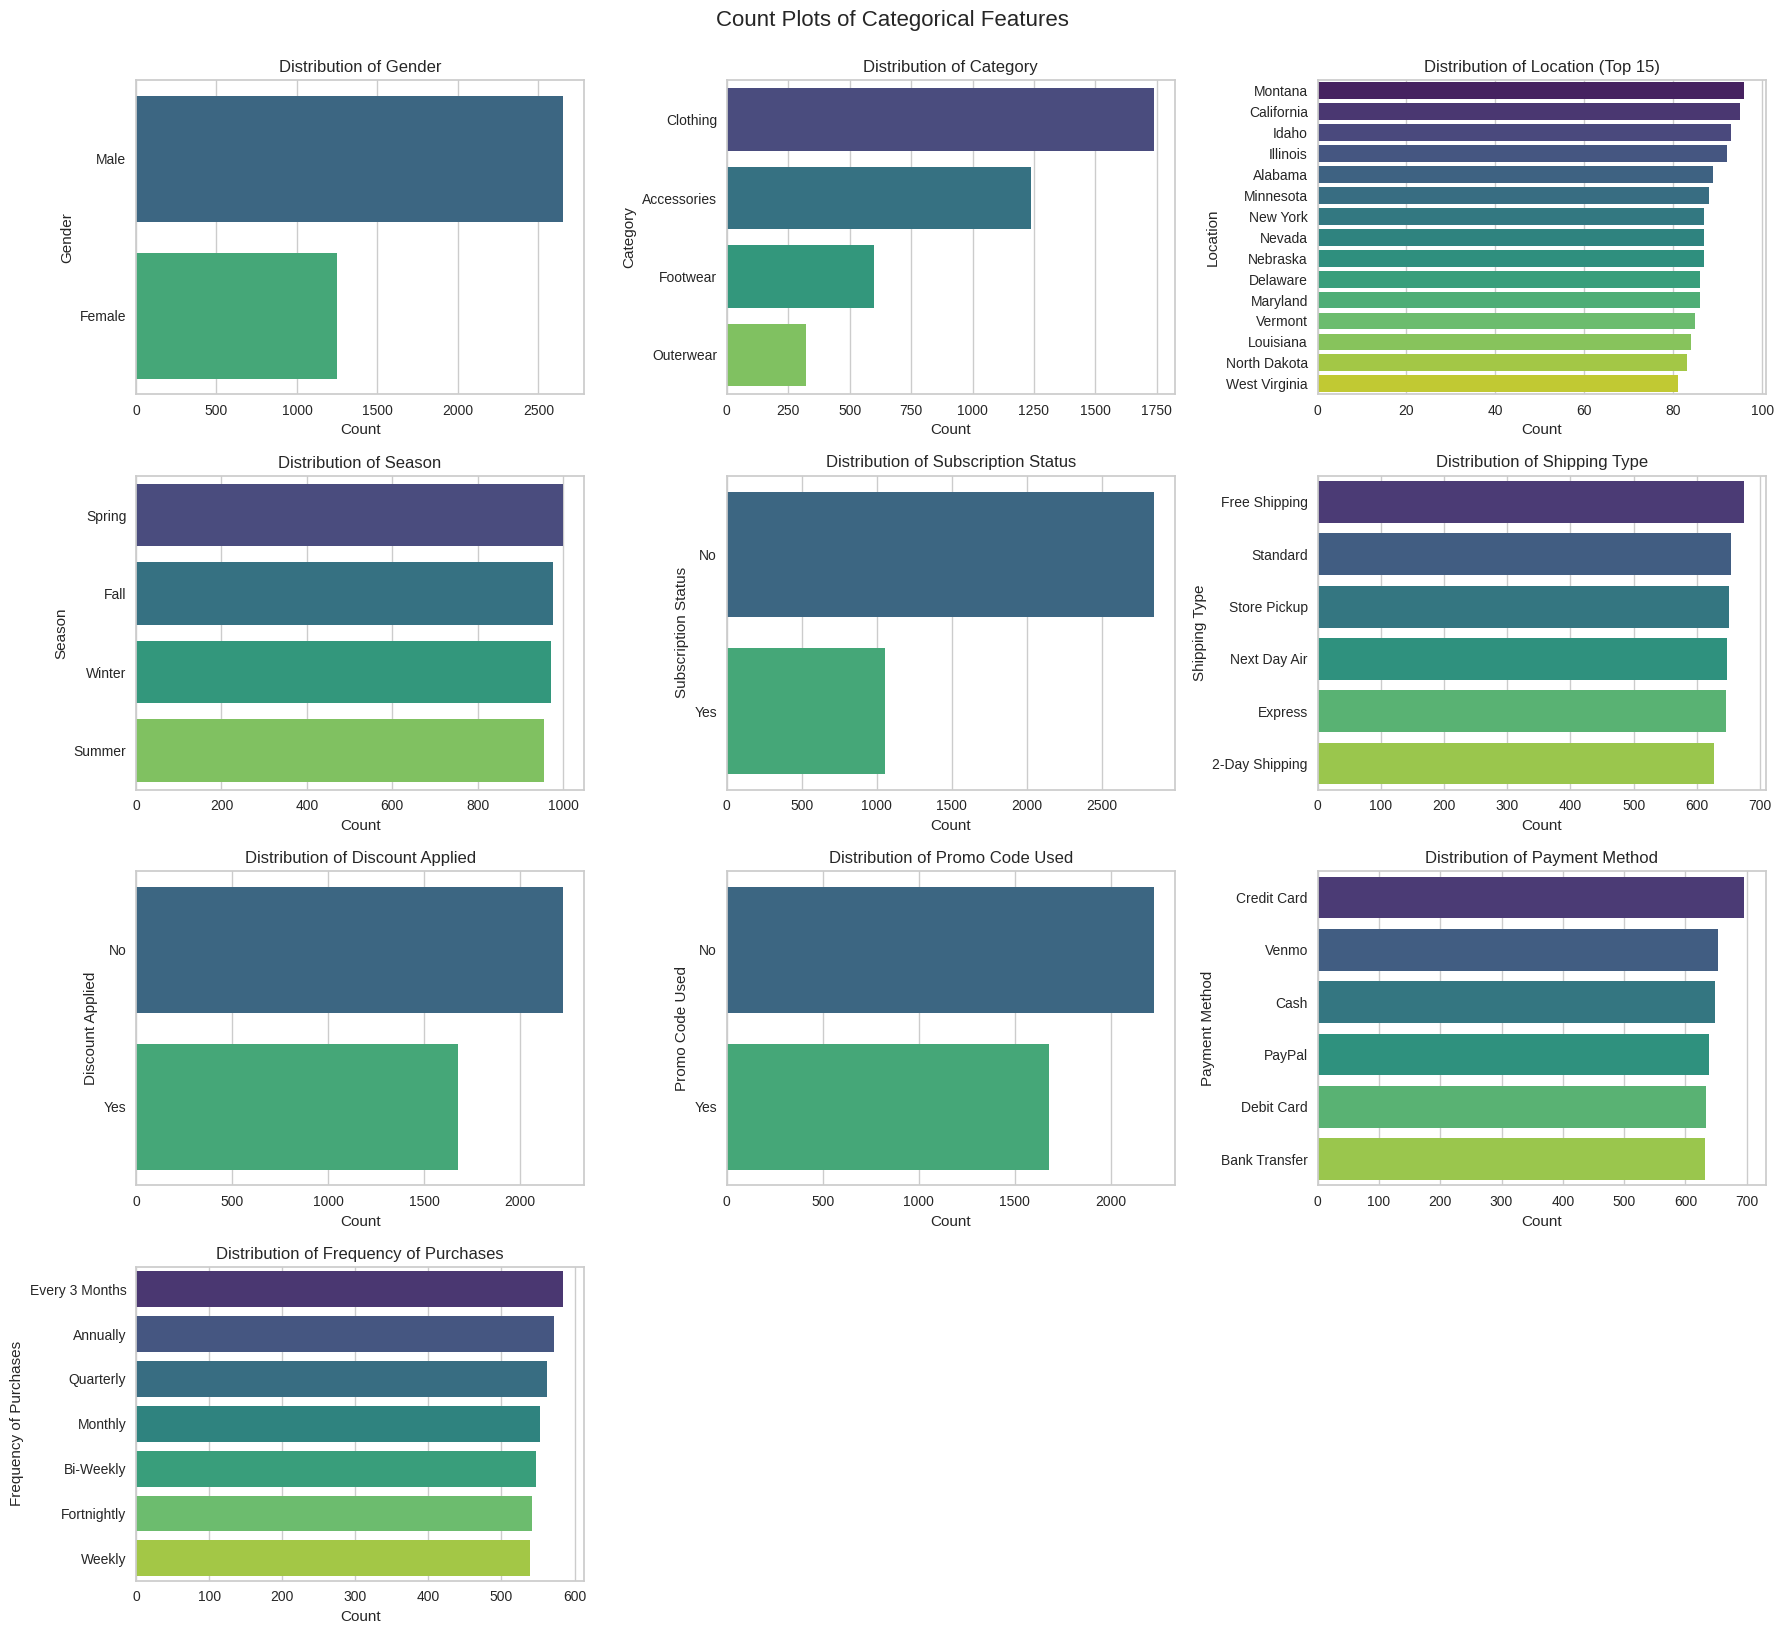

Displayed count plots for categorical features.


In [ ]:
# Count Plots (Bar Charts) for Categorical Features
if actual_categorical_features_eda:
    num_plots = len(actual_categorical_features_eda)
    if num_plots > 0:
        # Determine layout dynamically - aim for max 3 columns
        num_cols = min(3, num_plots)
        num_rows = math.ceil(num_plots / num_cols)
        plt.figure(figsize=(6 * num_cols, 4 * num_rows)) # ajuste o tamanho com base na grade
        for i, col in enumerate(actual_categorical_features_eda):
            plt.subplot(num_rows, num_cols, i + 1)
            # Use seaborn's countplot
            order = df[col].value_counts().index[:15] # Limite às 15 principais categorias para facilitar a leitura
            sns.countplot(data=df, y=col, order=order, palette='viridis') # Use y=col para barras horizontais se houver muitas categorias
            plt.title(f'Distribution of {col}')
            plt.xlabel('Count')
            plt.ylabel(col) # Rótulo correto para o eixo y
            if len(order) < df[col].nunique():
                 plt.title(f'Distribution of {col} (Top 15)') # Atualizar

        plt.tight_layout()
        plt.suptitle('Count Plots of Categorical Features', y=1.02, size=16)
        plt.show()
        print("Displayed count plots for categorical features.")
    else:
        print("No categorical features to plot count plots for.")



Tabela de Frequência: Gender vs Frequency of Purchases
Contagens Absolutas:
Frequency of Purchases  Annually  Bi-Weekly  Every 3 Months  Fortnightly  \
Gender                                                                     
Female                       185        188             186          163   
Male                         387        359             398          379   

Frequency of Purchases  Monthly  Quarterly  Weekly  
Gender                                              
Female                      185        169     172  
Male                        368        394     367  

Percentuais (por Linha - Gênero):
Frequency of Purchases  Annually  Bi-Weekly  Every 3 Months  Fortnightly  \
Gender                                                                     
Female                      14.8       15.1            14.9         13.1   
Male                        14.6       13.5            15.0         14.3   

Frequency of Purchases  Monthly  Quarterly  Weekly  
Gender       

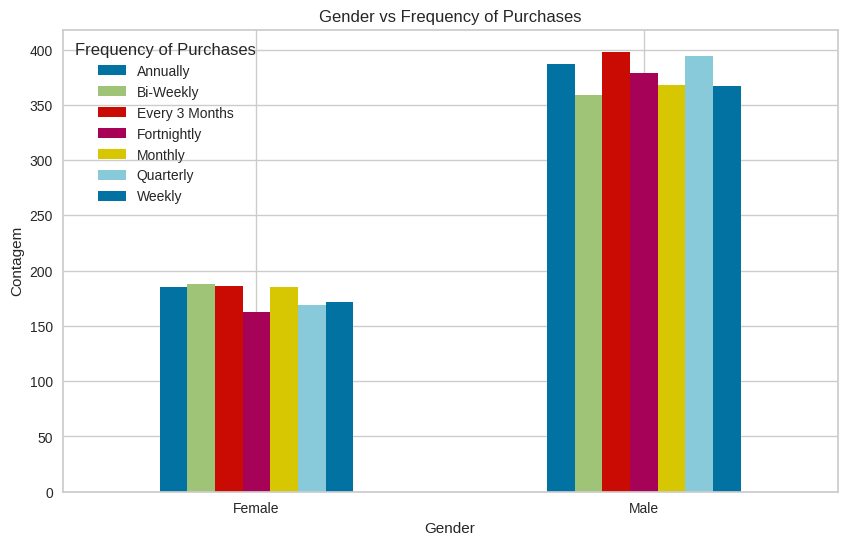

In [ ]:
 #Atributos Qualitativos vs. Atributos Qualitativos -> Tabelas de Frequência (Crosstabs)
# Exemplo: 'Gender' vs 'Frequency of Purchases'
if 'Gender' in df.columns and 'Frequency of Purchases' in df.columns:
    print("\nTabela de Frequência: Gender vs Frequency of Purchases")
    cross_tab_gf = pd.crosstab(df['Gender'], df['Frequency of Purchases'])
    print("Contagens Absolutas:")
    print(cross_tab_gf)
    print("\nPercentuais (por Linha - Gênero):")
    print(cross_tab_gf.apply(lambda r: r/r.sum()*100, axis=1).round(1))

    # Visualização da tabela de frequência
    cross_tab_gf.plot(kind='bar', stacked=False, figsize=(10,6))
    plt.title('Gender vs Frequency of Purchases')
    plt.ylabel('Contagem')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("Não foi possível gerar tabela de frequência para 'Gender' vs 'Frequency of Purchases'.")


Gerando Boxplots: Atributos Qualitativos vs. Purchase Amount (USD)


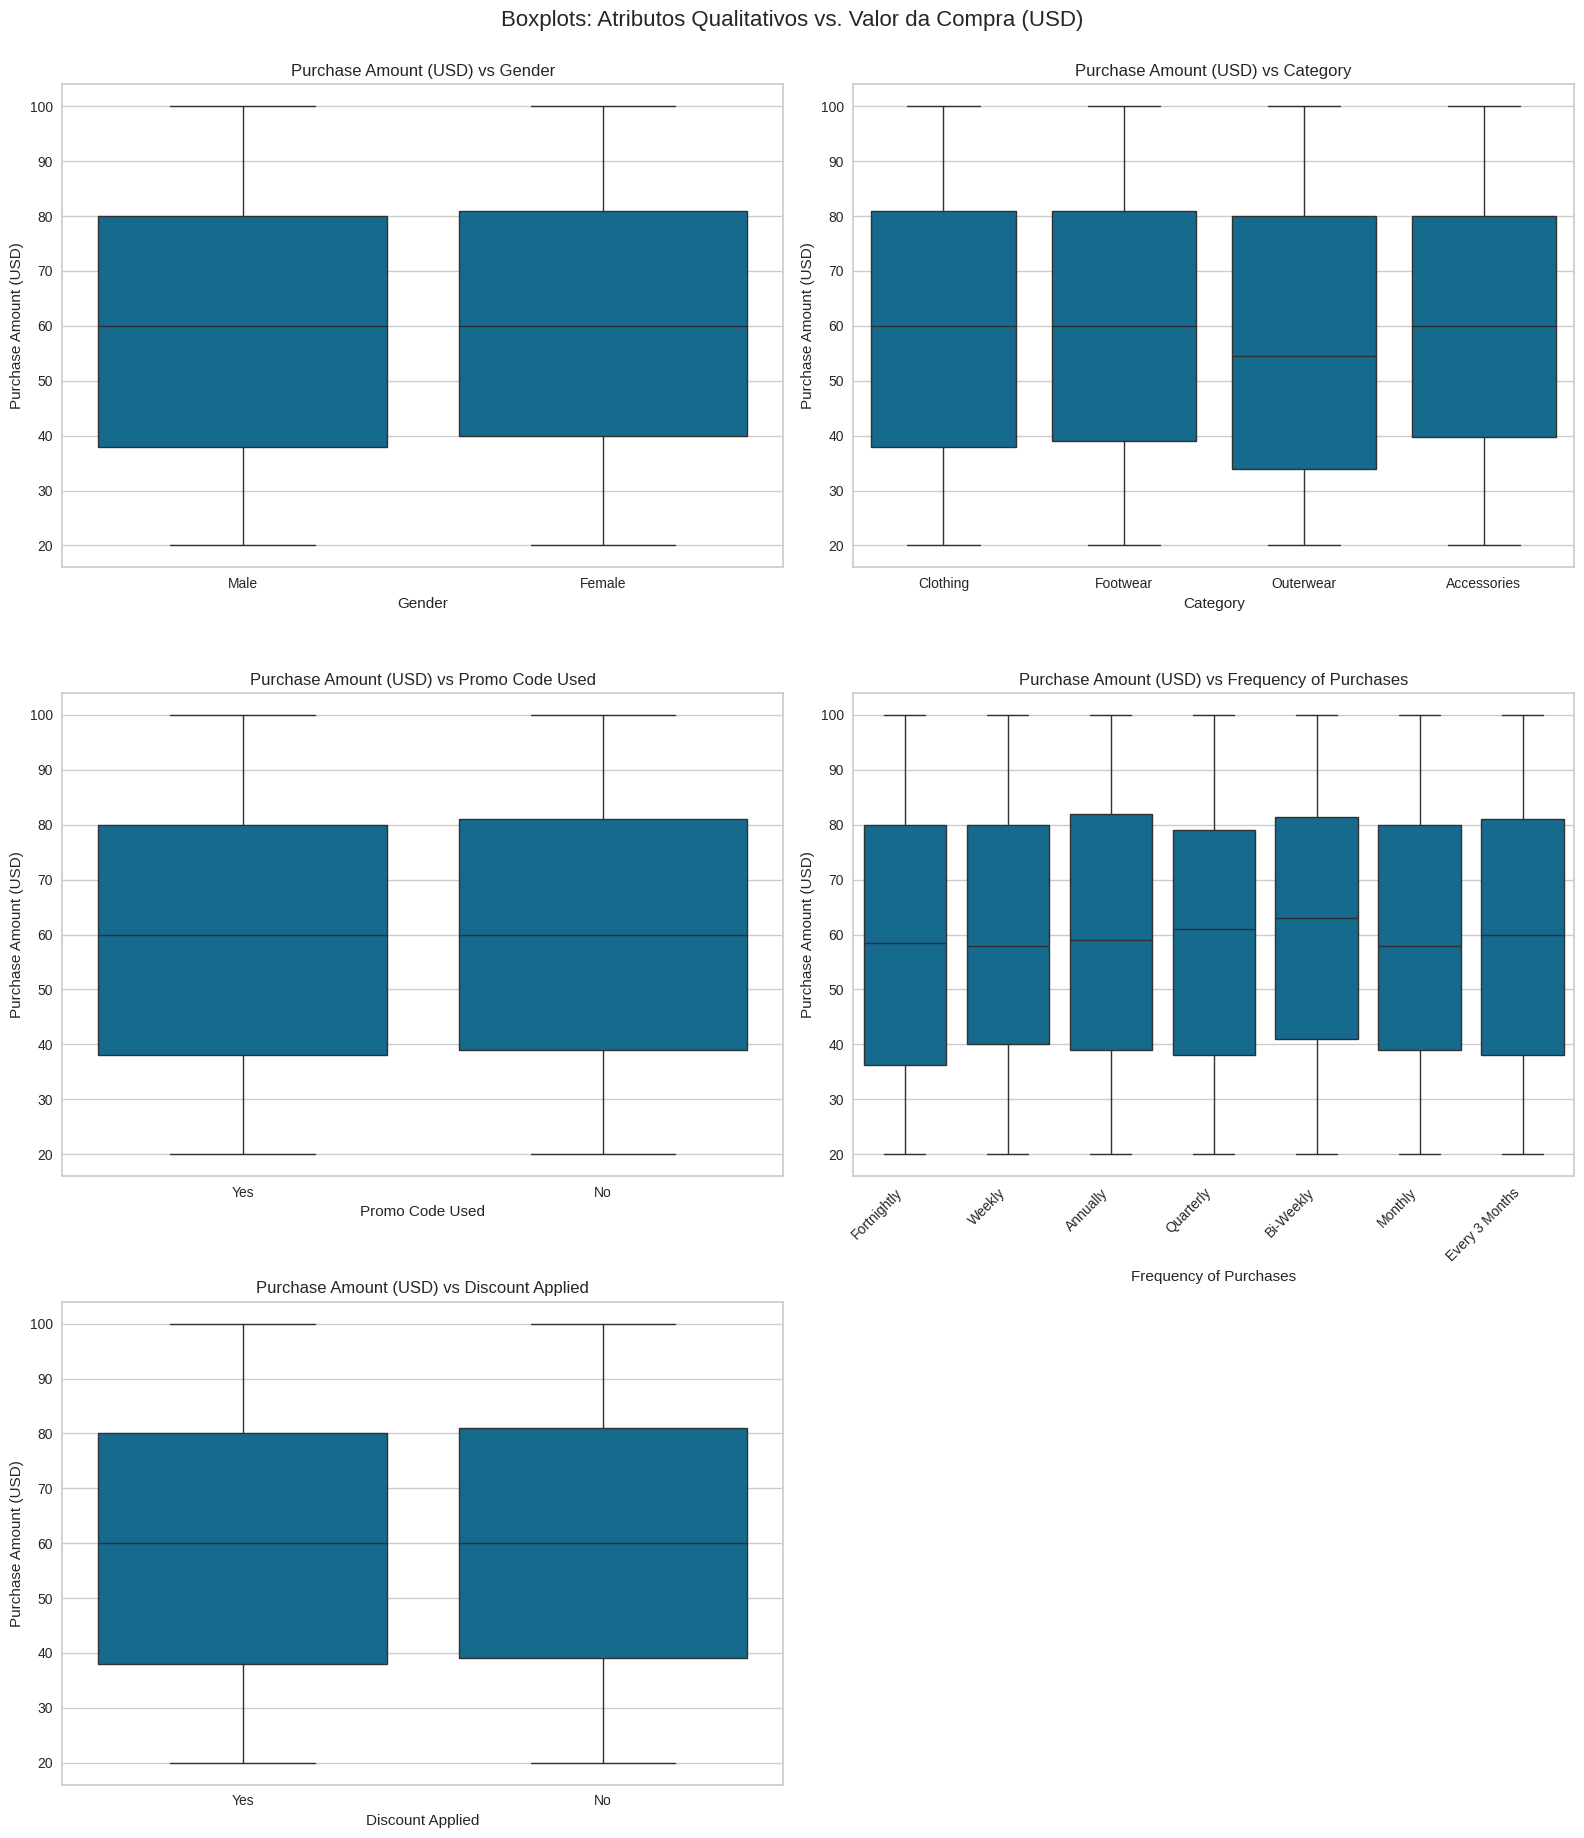

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# A. Atributos Qualitativos vs. 'Purchase Amount (USD)' (Quantitativa) -> Boxplots
# Selecionar atributos qualitativos chave (ajustado: trocado 'Location' por 'Discount Applied')
qual_features_for_bivariate = ['Gender', 'Category', 'Promo Code Used', 'Frequency of Purchases', 'Discount Applied']
# Filtrar para garantir que os atributos existem no DataFrame
qual_features_for_bivariate = [col for col in qual_features_for_bivariate if col in df.columns]

if 'Purchase Amount (USD)' in df.columns and qual_features_for_bivariate:
    print("\nGerando Boxplots: Atributos Qualitativos vs. Purchase Amount (USD)")
    num_plots = len(qual_features_for_bivariate)
    num_cols_viz = min(2, num_plots)
    num_rows_viz = math.ceil(num_plots / num_cols_viz)
    plt.figure(figsize=(8 * num_cols_viz, 6 * num_rows_viz))

    for i, col in enumerate(qual_features_for_bivariate):
        plt.subplot(num_rows_viz, num_cols_viz, i + 1)
        sns.boxplot(x=df[col], y=df['Purchase Amount (USD)'])
        plt.title(f'Purchase Amount (USD) vs {col}')
        if df[col].nunique() > 5:
            plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.suptitle('Boxplots: Atributos Qualitativos vs. Valor da Compra (USD)', y=1.02, fontsize=16)
    plt.show()
else:
    print("Não foi possível gerar boxplots: 'Purchase Amount (USD)' ou atributos qualitativos chave não encontrados.")


Início - Cluster

In [ ]:
!pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 8.4 MB/s eta 0:00:00


In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


**Objetivo do Projeto**

Desenvolver um modelo de clusterização de clientes para identificar grupos com comportamentos e perfis semelhantes, a fim de direcionar campanhas de marketing personalizadas.

Modelagem para o cluster

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from feature_engine.encoding import OneHotEncoder

In [ ]:
df= df.filter(['Customer ID','Age','Purchase Amount (USD)','Category',"Item Purchased",'Season','Promo Code Used','Discount Applied','Preferred Payment Method'])
df.head(3)

,Customer ID,Age,Purchase Amount (USD),Category,Item Purchased,Season,Promo Code Used,Discount Applied,Preferred Payment Method
0,1,55,53,Clothing,Blouse,Winter,Yes,Yes,Venmo
1,2,19,64,Clothing,Sweater,Winter,Yes,Yes,Cash
2,3,50,73,Clothing,Jeans,Spring,Yes,Yes,Credit Card


Modelagem perfil de compra

In [ ]:
bins = [0, 12, 17, 20, 24, 29, 34, 39, 44, 49, 54, 64, float('inf')]
labels = [
    'Infantil', 'Adolescente', 'Jovem menor de idade',
    'Jovem universitário', 'Jovem profissional', 'Adulto inicial',
    'Adulto médio', 'Adulto avançado', 'Meia-idade inicial',
    'Meia-idade avançada', 'Pré-idoso', 'Idoso'
]
df['FaixaEtaria'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [ ]:
bool_cols = ['Promo Code Used', 'Discount Applied']
for col in bool_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df.head()

,Customer ID,Age,Purchase Amount (USD),Category,Item Purchased,Season,Promo Code Used,Discount Applied,Preferred Payment Method,FaixaEtaria
0,1,55,53,Clothing,Blouse,Winter,1,1,Venmo,Pré-idoso
1,2,19,64,Clothing,Sweater,Winter,1,1,Cash,Jovem menor de idade
2,3,50,73,Clothing,Jeans,Spring,1,1,Credit Card,Meia-idade avançada
3,4,21,90,Footwear,Sandals,Spring,1,1,PayPal,Jovem universitário
4,5,45,49,Clothing,Blouse,Spring,1,1,PayPal,Meia-idade inicial


In [ ]:
df.dtypes

,0
Customer ID,int64
Age,int64
Purchase Amount (USD),int64
Category,object
Item Purchased,object
Season,object
Promo Code Used,int64
Discount Applied,int64
Preferred Payment Method,object
FaixaEtaria,category


Modelagem perfil de compra

In [ ]:
df_perfil_compra = pd.crosstab(df['FaixaEtaria'], df['Item Purchased'], normalize='index').reset_index()
df_perfil_compra

Item Purchased,FaixaEtaria,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
0,Jovem menor de idade,0.028302,0.056604,0.047170,0.037736,0.061321,0.056604,0.042453,0.037736,0.018868,...,0.042453,0.061321,0.033019,0.037736,0.056604,0.037736,0.042453,0.037736,0.070755,0.023585
1,Jovem universitário,0.021898,0.043796,0.036496,0.014599,0.051095,0.047445,0.043796,0.043796,0.047445,...,0.032847,0.040146,0.025547,0.043796,0.029197,0.051095,0.043796,0.029197,0.051095,0.065693
2,Jovem profissional,0.043367,0.043367,0.040816,0.040816,0.043367,0.033163,0.038265,0.033163,0.045918,...,0.043367,0.051020,0.033163,0.045918,0.061224,0.040816,0.035714,0.043367,0.033163,0.028061
3,Adulto inicial,0.063361,0.041322,0.046832,0.030303,0.041322,0.030303,0.044077,0.030303,0.030303,...,0.016529,0.055096,0.041322,0.046832,0.030303,0.035813,0.055096,0.044077,0.035813,0.055096
4,Adulto médio,0.044321,0.047091,0.047091,0.049861,0.022161,0.030471,0.044321,0.024931,0.052632,...,0.052632,0.049861,0.024931,0.027701,0.027701,0.036011,0.019391,0.036011,0.044321,0.036011
5,Adulto avançado,0.046196,0.038043,0.048913,0.032609,0.029891,0.051630,0.019022,0.035326,0.057065,...,0.065217,0.040761,0.027174,0.029891,0.024457,0.032609,0.040761,0.032609,0.029891,0.035326
6,Meia-idade inicial,0.018868,0.064690,0.024259,0.029650,0.051213,0.053908,0.035040,0.037736,0.021563,...,0.037736,0.037736,0.051213,0.056604,0.045822,0.040431,0.029650,0.037736,0.045822,0.035040
7,Meia-idade avançada,0.039370,0.026247,0.060367,0.052493,0.036745,0.034121,0.020997,0.047244,0.044619,...,0.031496,0.020997,0.052493,0.036745,0.041995,0.047244,0.047244,0.057743,0.044619,0.031496
8,Pré-idoso,0.029294,0.034621,0.041278,0.042610,0.049268,0.043941,0.034621,0.045273,0.042610,...,0.039947,0.045273,0.045273,0.045273,0.043941,0.030626,0.039947,0.046605,0.039947,0.034621
9,Idoso,0.032787,0.032787,0.046838,0.028103,0.030445,0.049180,0.042155,0.049180,0.025761,...,0.039813,0.037471,0.037471,0.028103,0.042155,0.030445,0.053864,0.037471,0.042155,0.037471


In [ ]:
df_perfil_compra_sem_chave = df_perfil_compra.drop(columns=["FaixaEtaria"])

Modelo perfil de compra

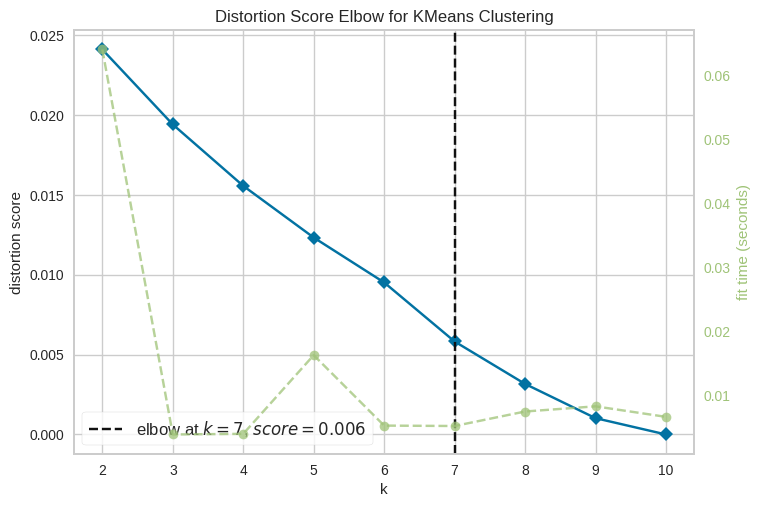

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2, 11))
visualizer.fit(df_perfil_compra_sem_chave)
visualizer.show();

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(df_perfil_compra_sem_chave)
df_perfil_compra['cluster_id_perfil_compra'] = kmeans.labels_

In [ ]:
df_perfil_compra.head()

Item Purchased,FaixaEtaria,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,...,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt,cluster_id_perfil_compra
0,Jovem menor de idade,0.028302,0.056604,0.047170,0.037736,0.061321,0.056604,0.042453,0.037736,0.018868,...,0.061321,0.033019,0.037736,0.056604,0.037736,0.042453,0.037736,0.070755,0.023585,1
1,Jovem universitário,0.021898,0.043796,0.036496,0.014599,0.051095,0.047445,0.043796,0.043796,0.047445,...,0.040146,0.025547,0.043796,0.029197,0.051095,0.043796,0.029197,0.051095,0.065693,2
2,Jovem profissional,0.043367,0.043367,0.040816,0.040816,0.043367,0.033163,0.038265,0.033163,0.045918,...,0.051020,0.033163,0.045918,0.061224,0.040816,0.035714,0.043367,0.033163,0.028061,5
3,Adulto inicial,0.063361,0.041322,0.046832,0.030303,0.041322,0.030303,0.044077,0.030303,0.030303,...,0.055096,0.041322,0.046832,0.030303,0.035813,0.055096,0.044077,0.035813,0.055096,0
4,Adulto médio,0.044321,0.047091,0.047091,0.049861,0.022161,0.030471,0.044321,0.024931,0.052632,...,0.049861,0.024931,0.027701,0.027701,0.036011,0.019391,0.036011,0.044321,0.036011,6


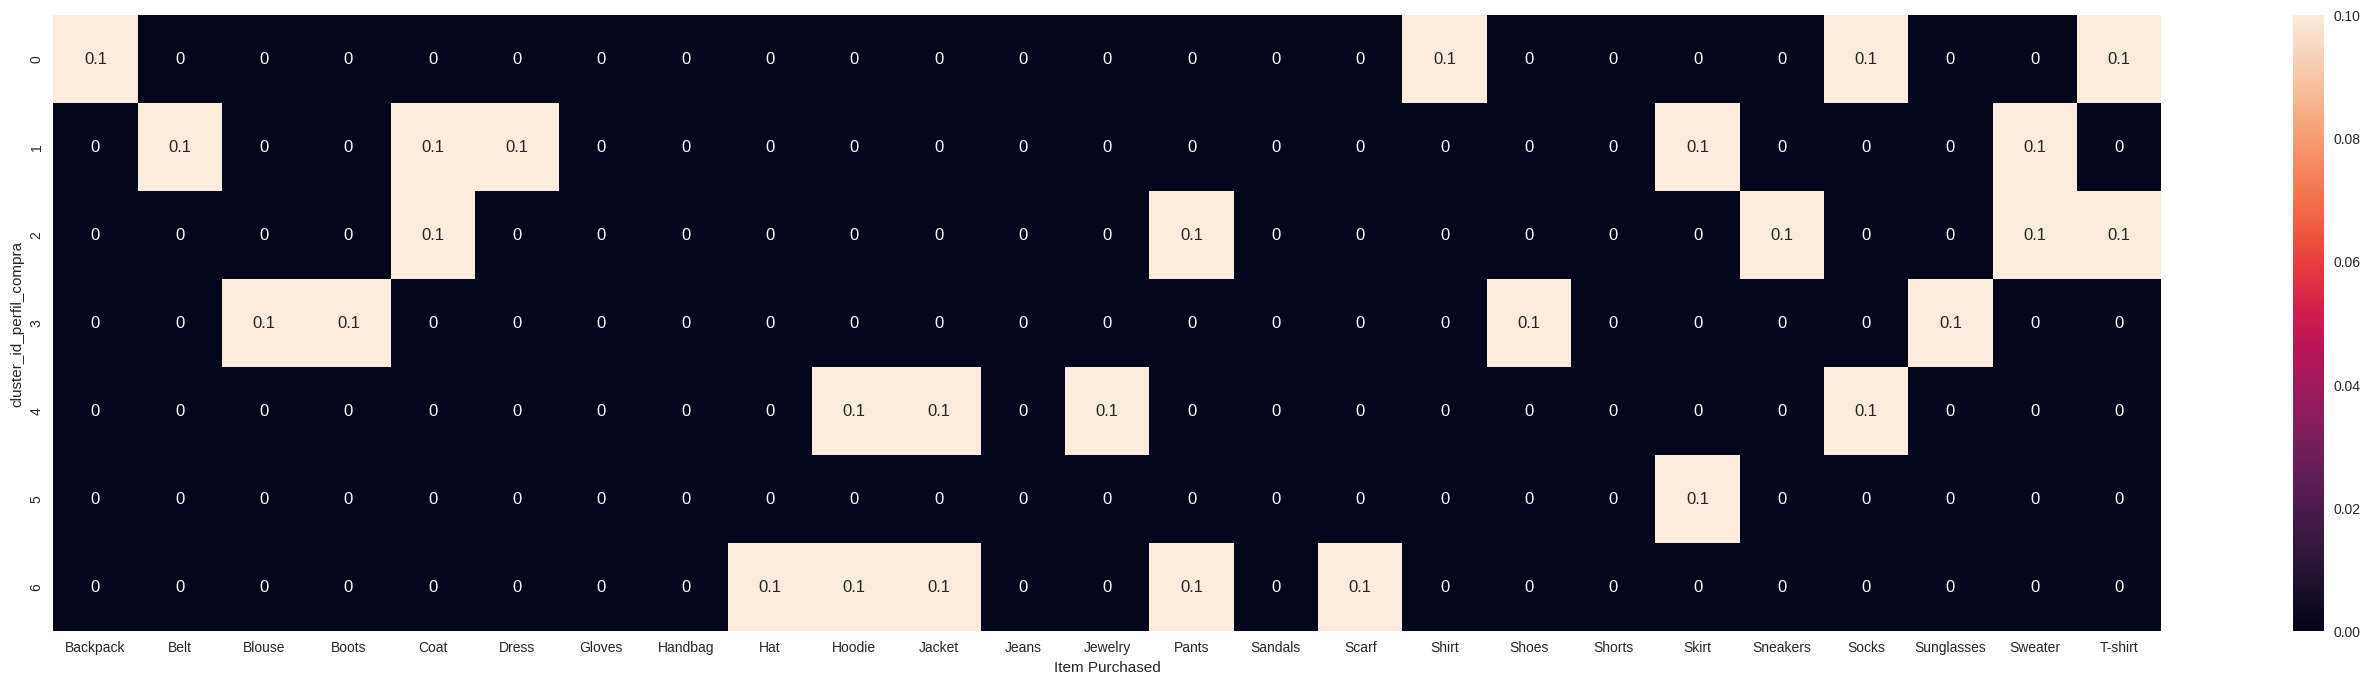

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(34, 8))
sns.heatmap(df_perfil_compra_sem_chave.groupby(df_perfil_compra['cluster_id_perfil_compra']).mean().round(1), annot=True);

Analisar quais sao as faixas de idade mais contidas em cada cluster

In [ ]:
df.head()

,Customer ID,Age,Purchase Amount (USD),Category,Item Purchased,Season,Promo Code Used,Discount Applied,Preferred Payment Method,FaixaEtaria
0,1,55,53,Clothing,Blouse,Winter,1,1,Venmo,Pré-idoso
1,2,19,64,Clothing,Sweater,Winter,1,1,Cash,Jovem menor de idade
2,3,50,73,Clothing,Jeans,Spring,1,1,Credit Card,Meia-idade avançada
3,4,21,90,Footwear,Sandals,Spring,1,1,PayPal,Jovem universitário
4,5,45,49,Clothing,Blouse,Spring,1,1,PayPal,Meia-idade inicial


In [ ]:
#RFV #Aqui não deveria estar pelas categorias de idade que criamos? Preciso ajustar do maior para o menor

df_perfil_compra_desconto =(df.
 filter(['Age', 'Purchase Amount (USD)', 'Discount Applied'])
 .groupby('Age')
 .agg(total_gasto = ('Purchase Amount (USD)', 'sum'),
      desconto = ("Discount Applied", "sum")
      ).reset_index()
 )
df_perfil_compra_desconto.head()

,Age,total_gasto,desconto
0,18,4139,29
1,19,4941,33
2,20,3424,32
3,21,4423,31
4,22,4011,27


In [ ]:
#ranqueamento
df_perfil_compra_desconto['rank_pct_total_gasto'] = df_perfil_compra_desconto['total_gasto'].rank(pct=True) #.rank(pct = true) = percentual
df_perfil_compra_desconto["rank_pct_desconto"] = df_perfil_compra_desconto['desconto'].rank(pct=True)

In [ ]:
df_perfil_compra_desconto.head()

,Age,total_gasto,desconto,rank_pct_total_gasto,rank_pct_desconto
0,18,4139,29,0.301887,0.367925
1,19,4941,33,0.867925,0.584906
2,20,3424,32,0.056604,0.547170
3,21,4423,31,0.584906,0.490566
4,22,4011,27,0.169811,0.264151


In [ ]:
X_abt_total_desconto = df_perfil_compra_desconto[['rank_pct_total_gasto', 'rank_pct_desconto']].copy()

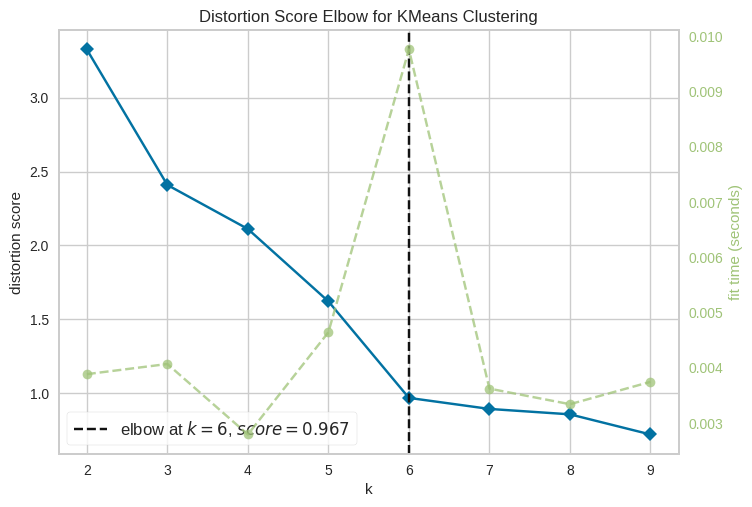

In [ ]:
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(X_abt_total_desconto)
visualizer.show();

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_abt_total_desconto)
df_perfil_compra_desconto['cluster_id_gasto_desconto'] = kmeans.labels_

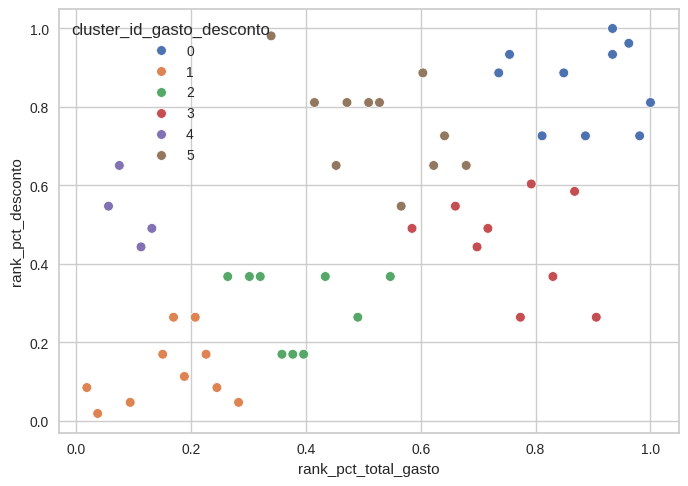

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df_perfil_compra_desconto, x='rank_pct_total_gasto', y='rank_pct_desconto', hue='cluster_id_gasto_desconto', s=50, palette='deep');

Silhouette Score

Vamos fazer a análise do gráfico de silhueta para confirmar se K=6 é a melhor opção ou se devemos utilizar outro valor de K

In [ ]:
from sklearn.metrics import silhouette_score

k_range = range(2, 11)
sil_scores = []

for k in k_range:
    labels = KMeans(n_clusters=k, random_state=42).fit_predict(X_abt_total_desconto)
    sil_scores.append(silhouette_score(X_abt_total_desconto, labels))

In [ ]:
for k, s in zip(k_range, sil_scores):
    print(f"k = {k}: silhouette = {s:.4f}")

k = 2: silhouette = 0.5186
k = 3: silhouette = 0.3909
k = 4: silhouette = 0.2809
k = 5: silhouette = 0.3697
k = 6: silhouette = 0.4305
k = 7: silhouette = 0.4212
k = 8: silhouette = 0.3612
k = 9: silhouette = 0.3598
k = 10: silhouette = 0.3896


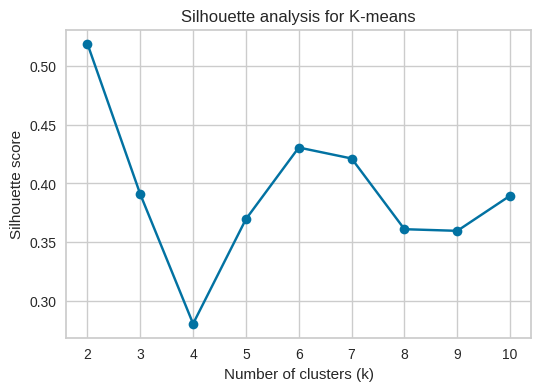

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(k_range, sil_scores, marker="o")
plt.xticks(k_range)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette analysis for K-means")
plt.grid(True)
plt.show()

Embora K= 2, nos traria um modelo estatisticamente mais forte, nos obrigaria a a fazer a distinção somente entre 2 grupos de consumidores, o que não é caso que temos em nossa base. Como desejamos refinar a segmentação dos nossos clientes, vamos optar por k=6, já que nos permite fazer isso.

In [ ]:
# Contagem de pessoas para k=2
k = 2
model = KMeans(n_clusters=k, random_state=42).fit(X_abt_total_desconto)

# rotule cada valor de IDADE
age2cluster = pd.DataFrame({
    'Age': df_perfil_compra_desconto['Age'],
    f'cluster{k}': model.labels_
})

#mesclar novamente os dados completos do nível do cliente
df_labeled = df.merge(age2cluster, on='Age', how='left')

print("Customer counts per cluster:")
print(df_labeled[f'cluster{k}'].value_counts().sort_index())


Customer counts per cluster:
cluster2
0    2341
1    1559
Name: count, dtype: int64


In [ ]:
# Contagem de pessoas para k=3
k = 6
model = KMeans(n_clusters=k, random_state=42).fit(X_abt_total_desconto)

# otule cada valor de IDADE
age2cluster = pd.DataFrame({
    'Age': df_perfil_compra_desconto['Age'],
    f'cluster{k}': model.labels_
})

# mesclar novamente os dados completos do nível do cliente
df_labeled = df.merge(age2cluster, on='Age', how='left')

print("Customer counts per cluster:")
print(df_labeled[f'cluster{k}'].value_counts().sort_index())


Customer counts per cluster:
cluster6
0    827
1    653
2    641
3    687
4    265
5    827
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
id2label_pt = {
    0: "Gastos altos",
    1: "Gastos baixos",
    2: "Gastos moderados",
    3: "Gastos levemente altos",
    4: "Gastos de moderados para baixo",
    5: "Gastos moderados para altos",
}

In [ ]:
centroids = kmeans.cluster_centers_

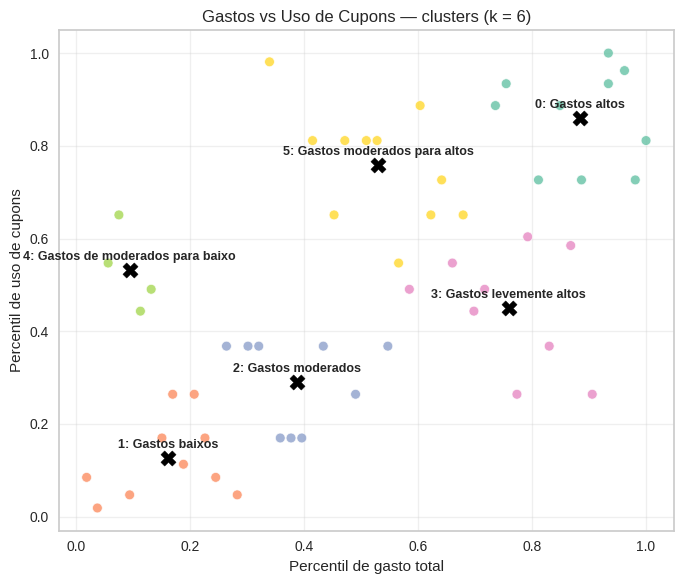

In [ ]:
plt.figure(figsize=(7, 6))

sns.scatterplot(
    # Changed data to the correct DataFrame
    data=df_perfil_compra_desconto,
    x='rank_pct_total_gasto',
    y='rank_pct_desconto',
    # Changed hue to the correct cluster column
    hue='cluster_id_gasto_desconto',
    palette='Set2',
    s=50,
    alpha=0.8,
    # Keep legend=False if you prefer not to show the default legend
    legend=False
)

# marca centróides e adiciona texto
for idx, (cx, cy) in enumerate(centroids):
    plt.scatter(cx, cy, c='black', s=120, marker='X')
    plt.text(cx, cy + 0.015,
             f"{idx}: {id2label_pt[idx]}",
             ha='center', va='bottom',
             fontsize=9, weight='bold')

plt.title("Gastos vs Uso de Cupons — clusters (k = 6)")
plt.xlabel("Percentil de gasto total")
plt.ylabel("Percentil de uso de cupons")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Cluster #0: Apresentam gastos altos, estão localizados no canto superior direito

Cluster #1: Apresentam gastos baixo, estão localizados no canto inferior esquerdo

Cluster #2: Apresentam gastos moderados, estão localizados no lado esquerdo próximos ao centro do gráfico

Cluster #3: Apresentam gastos altos, estão localizados no lado direito próximos ao centro do gráfico

Cluster #4: Apresentam gastos de moderados para baixo, estão localizados no lado esquerdo próximos no centro do gráfico

Cluster #5: Apresentam gastos moderados para altos, estão localizados no lado direito próximos acima do centro do gráfico

### **Início de Deep Learning**

In [ ]:
df_labeled.columns.tolist()

['Customer ID',
 'Age',
 'Purchase Amount (USD)',
 'Category',
 'Item Purchased',
 'Season',
 'Promo Code Used',
 'Discount Applied',
 'Preferred Payment Method',
 'FaixaEtaria',
 'cluster6']

In [ ]:
print(df_labeled['cluster6'].value_counts())

cluster6
5    827
0    827
3    687
1    653
2    641
4    265
Name: count, dtype: int64


In [ ]:
df_labeled.head()

,Customer ID,Age,Purchase Amount (USD),Category,Item Purchased,Season,Promo Code Used,Discount Applied,Preferred Payment Method,FaixaEtaria,cluster6
0,1,55,53,Clothing,Blouse,Winter,1,1,Venmo,Pré-idoso,5
1,2,19,64,Clothing,Sweater,Winter,1,1,Cash,Jovem menor de idade,3
2,3,50,73,Clothing,Jeans,Spring,1,1,Credit Card,Meia-idade avançada,0
3,4,21,90,Footwear,Sandals,Spring,1,1,PayPal,Jovem universitário,3
4,5,45,49,Clothing,Blouse,Spring,1,1,PayPal,Meia-idade inicial,1


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# features que usou no k-means anterior (ajuste se necessário)
features_cluster = pd.get_dummies(
    df_labeled_model[["Age", "Purchase Amount (USD)", "Category", "Season"]],
    drop_first=True
)

# k = 3
kmeans = KMeans(n_clusters=3, random_state=42).fit(features_cluster)

# adiciona a coluna no mesmo DataFrame que será usado depois
df_labeled_model["cluster3"] = kmeans.labels_

NameError: name 'df_labeled_model' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical

# 1. Carregar / limpar dados
df_labeled_model = df_labeled.drop(["Customer ID", "Item Purchased"], axis=1)

# 2. Separar alvo ANTES de codificar
y = df_labeled_model["cluster3"].values          # vetor 1‑D (0‑5)
X_raw = df_labeled_model.drop("cluster3", axis=1)

# 3. Codificar variáveis categóricas
X_encoded = pd.get_dummies(X_raw, drop_first=True)

# 4. Train / validation split (estratificado)
X_train, X_val, y_train_int, y_val_int = train_test_split(
    X_encoded.values,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# 5. Escalonamento SEM vazamento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit apenas no treino
X_val_scaled   = scaler.transform(X_val)         # transform no val

# 6. One‑hot encoding após split
y_train = to_categorical(y_train_int)
y_val   = to_categorical(y_val_int)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

input_dim = X_train.shape[1]
num_classes = y_train.shape[1]

model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

model.summary()

In [ ]:
# Avaliar o modelo
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val, verbose=0)

print("\n=== Resultado Final ===")
print(f"Perda de Validação : {val_loss:.4f}")
print(f"Acurácia de Validação: {val_accuracy:.4f}  ({val_accuracy*100:.2f}%)")

In [ ]:
# Plot das curvas de perda e acurácia
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Perda
axs[0].plot(history.history['loss'], label='Perda - Treino', color='blue')
axs[0].plot(history.history['val_loss'], label='Perda - Validação', color='orange')
axs[0].set_title('Curva de Perda por Época')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Perda')
axs[0].legend()
axs[0].grid(True)

# Acurácia
axs[1].plot(history.history['accuracy'], label='Acurácia - Treino', color='green')
axs[1].plot(history.history['val_accuracy'], label='Acurácia - Validação', color='red')
axs[1].set_title('Curva de Acurácia por Época')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Acurácia')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# ---------- Previsões ----------
y_pred_probs   = model.predict(X_val_scaled)           # usa o conjunto escalonado
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# ---------- Relatório ----------
print("\n=== Classification Report (validação) ===")
print(classification_report(y_true_classes, y_pred_classes, digits=4))

# ---------- Matriz de confusão ----------
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm,
            annot=True, fmt='d', cmap='Blues',
            xticklabels=range(cm.shape[0]),   # 0‑5
            yticklabels=range(cm.shape[0]))
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão – Conjunto de Validação")
plt.show()

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# --- dimensões derivadas dos dados já escalonados ---
input_dim   = X_train_scaled.shape[1]    # nº de features após get_dummies
num_classes = y_train.shape[1]           # 6 (one‑hot)

# --- definição do modelo ---
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(1e-4)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=5e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

# --- callbacks ---
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
]

# --- treinamento ---
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=200,
    batch_size=16,
    callbacks=callbacks,
    verbose=1
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1) Desempenho numérico (treino vs. validação)
train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
val_loss,   val_acc   = model.evaluate(X_val_scaled,  y_val,  verbose=0)

print("Resultados")
print(f"Treino     -> loss: {train_loss:.4f} | acc: {train_acc:.4%}")
print(f"Validação  -> loss: {val_loss:.4f} | acc: {val_acc:.4%}")

In [ ]:
# 2) Relatório de classificação e matriz de confusão
y_pred_prob   = model.predict(X_val_scaled, verbose=0)
y_pred_labels = np.argmax(y_pred_prob, axis=1)
y_true_labels = np.argmax(y_val,       axis=1)

print("\n=== Classification Report (validação) ===")
print(classification_report(y_true_labels, y_pred_labels, digits=4))

cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(cm.shape[0]),
            yticklabels=range(cm.shape[0]))
plt.xlabel("Classe predita")
plt.ylabel("Classe real")
plt.title("Matriz de Confusão – Conjunto de Validação")
plt.show()

In [ ]:
# 3) AUC macro‑média
try:
    auc_macro = roc_auc_score(y_val, y_pred_prob,
                              multi_class="ovo", average="macro")
    print(f"ROC‑AUC macro‑média: {auc_macro:.4f}")
except ValueError:
    print("ROC‑AUC não pôde ser calculado (é necessário ≥1 amostra positiva por classe).")


In [ ]:
# 4) Verificar qual foi a melhor epóca
best_epoch = np.argmin(history.history["val_loss"]) + 1
print(f"\nMelhor época (menor val_loss): {best_epoch}")

In [ ]:
# 5) Curvas de perda e acurácia (O objetivo é verificar o efeito da aplicação do early stopping)
fig, ax = plt.subplots(1, 2, figsize=(16,5))

# Perda
ax[0].plot(history.history["loss"],     label="Treino")
ax[0].plot(history.history["val_loss"], label="Validação")
ax[0].set_title("Perda por Época")
ax[0].set_xlabel("Época")
ax[0].set_ylabel("Perda")
ax[0].legend(); ax[0].grid(True)

# Acurácia
ax[1].plot(history.history["accuracy"],     label="Treino")
ax[1].plot(history.history["val_accuracy"], label="Validação")
ax[1].set_title("Acurácia por Época")
ax[1].set_xlabel("Época")
ax[1].set_ylabel("Acurácia")
ax[1].legend(); ax[1].grid(True)

plt.tight_layout()
plt.show()